In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import kagglehub

path = "titanic3.xls"

# Task 1: Data Loading and Initial Exploration
Lecture material: Lecture 3, slides 4–8, 10, and 11.
- Load the dataset into a Pandas DataFrame.
- Perform basic exploratory data analysis (EDA) to comprehend the structure and characteristics of the data.
Note: Your analysis should include appropriate exploratory statistics and visualizations

mirar mapa, introduction

In [585]:
df = pd.read_excel(path)

In [586]:
df.shape

(1309, 14)

Our dataset contains 1,309 entries; however, historical records indicate that the Titanic had a total of 2,240 passengers, of whom 1,510 lost their lives in 1912.

In [587]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [588]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [589]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Variables of the Dataset**
- pclass: Passenger class, represented as an integer from 1 to 3, indicating socio-economic status (1 = First Class, 2 = Second Class, 3 = Third Class).
- survived: Survival status of the passenger, where 1 = Survived and 0 = Did not survive, this is also out targe variable.
- name: Full name of the passenger, including title (e.g., Mr., Mrs., Miss), as a string.
- sex: Gender of the passenger, recorded as a string (female or male).
- age: Age of the passenger as an float.
- sibsp: Number of siblings and spouses the passenger had aboard the Titanic, as an integer
- parch: Number of parents and children the passenger was traveling with, as an integer.
- fare: Amount paid for the ticket, as a float ranging from 0 to 512.329, measured in British Pounds (£).
- cabin: Cabin number assigned to the passenger, recorded as a string.
- embarked: The port where the passenger boarded the ship. The Titanic's route started at Southampton (S), then stopped at Cherbourg (C), followed by Queenstown (Q), before finally heading to New York.
- boat: Number of the lifeboat the passenger boarded, if they were rescued
- body:  If the passenger did not survive, this indicates the body identification number, if recovered, recorded as float.
- home.dest: Final destination of the passenger, indicating where they were traveling to, recorded as a string.
- ticket

## Numerical variables

- **Age** is a numerical value, represented by an float, as there where baby in board, with less than 1 year.
- **Fare** is a float.
- **Body** is a float, this is sursprinsing, further analysis is going to be done later
- **SIbsp**
- **Parch**


### Age

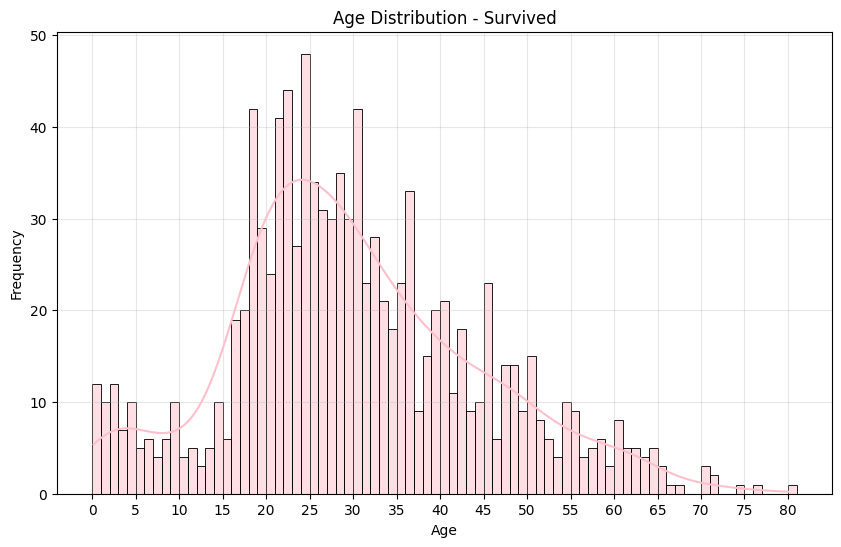

In [590]:
plt.figure(figsize=(10, 6))
bins_survived = np.arange(0, df['age'].max() + 2) 
sns.histplot(data=df, x='age', bins=bins_survived, 
             kde=True, color='pink',
             binrange=(0, df['age'].max() + 1))
plt.title('Age Distribution - Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)
plt.show()



The age distribution of Titanic passengers is right-skewed, with a mode around 20–25 years. However, due to the presence of older passengers, the mean is likely pulled to a higher value. This distribution does not follow a normal pattern, as it has a heavy tail extending up to age 80, indicating a broader age range with fewer older individuals.

Additionally, there are signs of age heaping, where people may have rounded their ages to numbers ending in 0 or 5 (e.g., 20, 30). This could suggest some inaccuracy in age reporting, with individuals approximating their age rather than providing exact values. Despite this, the data maintains a clear central tendency, with the majority of passengers being young adults.

To further analyze if age heaping was present, based on our hypothesis, individuals who didnt surived could have had their age misestimated by rounded to 5 or 0.

The age variable is a float, as we know that there could have been babies aboard the Titanic. The following graph shows the distribution of ages.

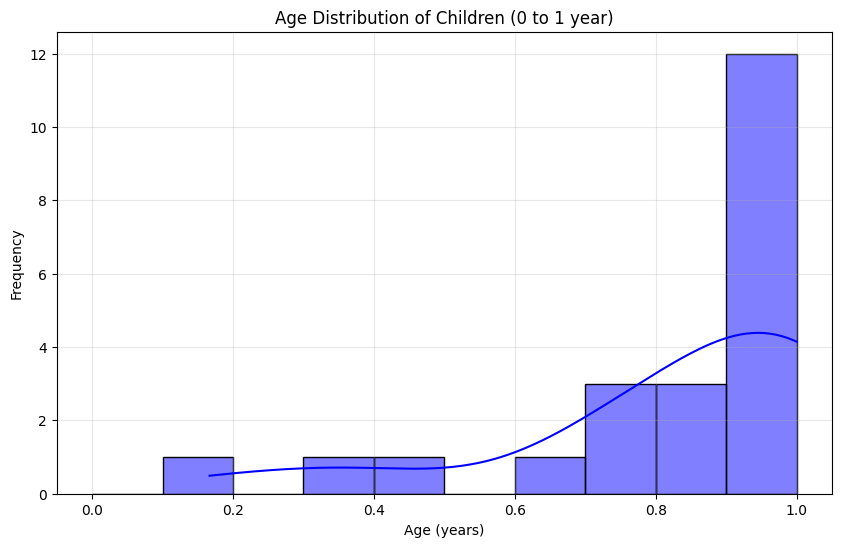

In [591]:
children_0_1 = df[(df['age'] >= 0) & (df['age'] <= 1)]
bins = np.arange(0, 1.1, 0.1)  
plt.figure(figsize=(10, 6))
sns.histplot(data=children_0_1, x='age', bins=bins, kde=True, color='blue')
plt.title('Age Distribution of Children (0 to 1 year)')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

It is important to check whether individuals older than 1 year have decimal values in their ages.

In [592]:
older_than_one_year = df[df['age'] > 1]
ages_with_decimals = older_than_one_year['age'] % 1 != 0

print(f"Total number of people older than 1 year with decimals in their age: {ages_with_decimals.sum()}")

ages_end_with_zero = older_than_one_year['age'] % 1 == 0
all_ages_end_with_zero = ages_end_with_zero.all()

if not all_ages_end_with_zero:
    non_integer_ages = older_than_one_year[~ages_end_with_zero]
    print("Rows where age does not end with .0:")
    print(non_integer_ages[['age']])


Total number of people older than 1 year with decimals in their age: 33
Rows where age does not end with .0:
       age
173   32.5
222   28.5
224   45.5
512   32.5
516   36.5
568   18.5
584   32.5
692   18.5
727   70.5
741   22.5
758   36.5
796   40.5
797   40.5
847   23.5
919   18.5
924   34.5
960   34.5
977   20.5
992   30.5
1015  55.5
1066  28.5
1169  38.5
1171  14.5
1192  24.5
1225  60.5
1251  30.5
1263  11.5
1264  40.5
1285  32.5
1294  28.5
1301  45.5
1304  14.5
1306  26.5


As we can see, there are 33 individuals older than 1 year whose age has a decimal, specifically, all of these individuals have their age ending in .5. It is interesting to explore the survival status of these individuals

In [593]:
ages_with_decimals = older_than_one_year[older_than_one_year['age'] % 1 != 0]

ages_with_half_decimal = ages_with_decimals[ages_with_decimals['age'] % 1 == 0.5]

total_individuals = len(ages_with_half_decimal)
print(f"Total number of individuals older than 1 year with ages ending in .5: {total_individuals}")

survival_status = ages_with_half_decimal['survived'].value_counts(normalize=True)

print(f"Proportion of survivors: {survival_status.get(1, 0):.2f}")
print(f"Proportion of non-survivors: {survival_status.get(0, 0):.2f}")


Total number of individuals older than 1 year with ages ending in .5: 33
Proportion of survivors: 0.06
Proportion of non-survivors: 0.94


Even though 94% of individuals whose age ends in .5 did not survive, this data could be more meaningful if the sample of individuals with this specific characteristic were larger. However, it's challenging to generalize this idea to the entire model.

In [594]:
age_metrics = {
    'mean': df['age'].mean(),
    'variance': df['age'].var(),
    'standard_deviation': df['age'].std(),
    'median': df['age'].median(),
    'mode': df['age'].mode()[0],  
    'min': df['age'].min(),
    'max': df['age'].max(),
    'count': df['age'].count(),  
    'missing_values': df['age'].isnull().sum() 
}

for metric, value in age_metrics.items():
    print(f"{metric.capitalize()}: {value}")


Mean: 29.8811345124283
Variance: 207.74897359969773
Standard_deviation: 14.413499699923602
Median: 28.0
Mode: 24.0
Min: 0.1667
Max: 80.0
Count: 1046
Missing_values: 263


Based on the previous data, the variance of the age distribution is relatively high, indicating a broad spread of ages within the dataset. Additionally, there are 263 missing values in the age column; however, this will be assessed and addressed later.

In [595]:
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

max_age_not_survived = not_survived['age'].max()
print(max_age_not_survived)

74.0


C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\1025235013.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette="Set2")
C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\1025235013.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette="Set2")


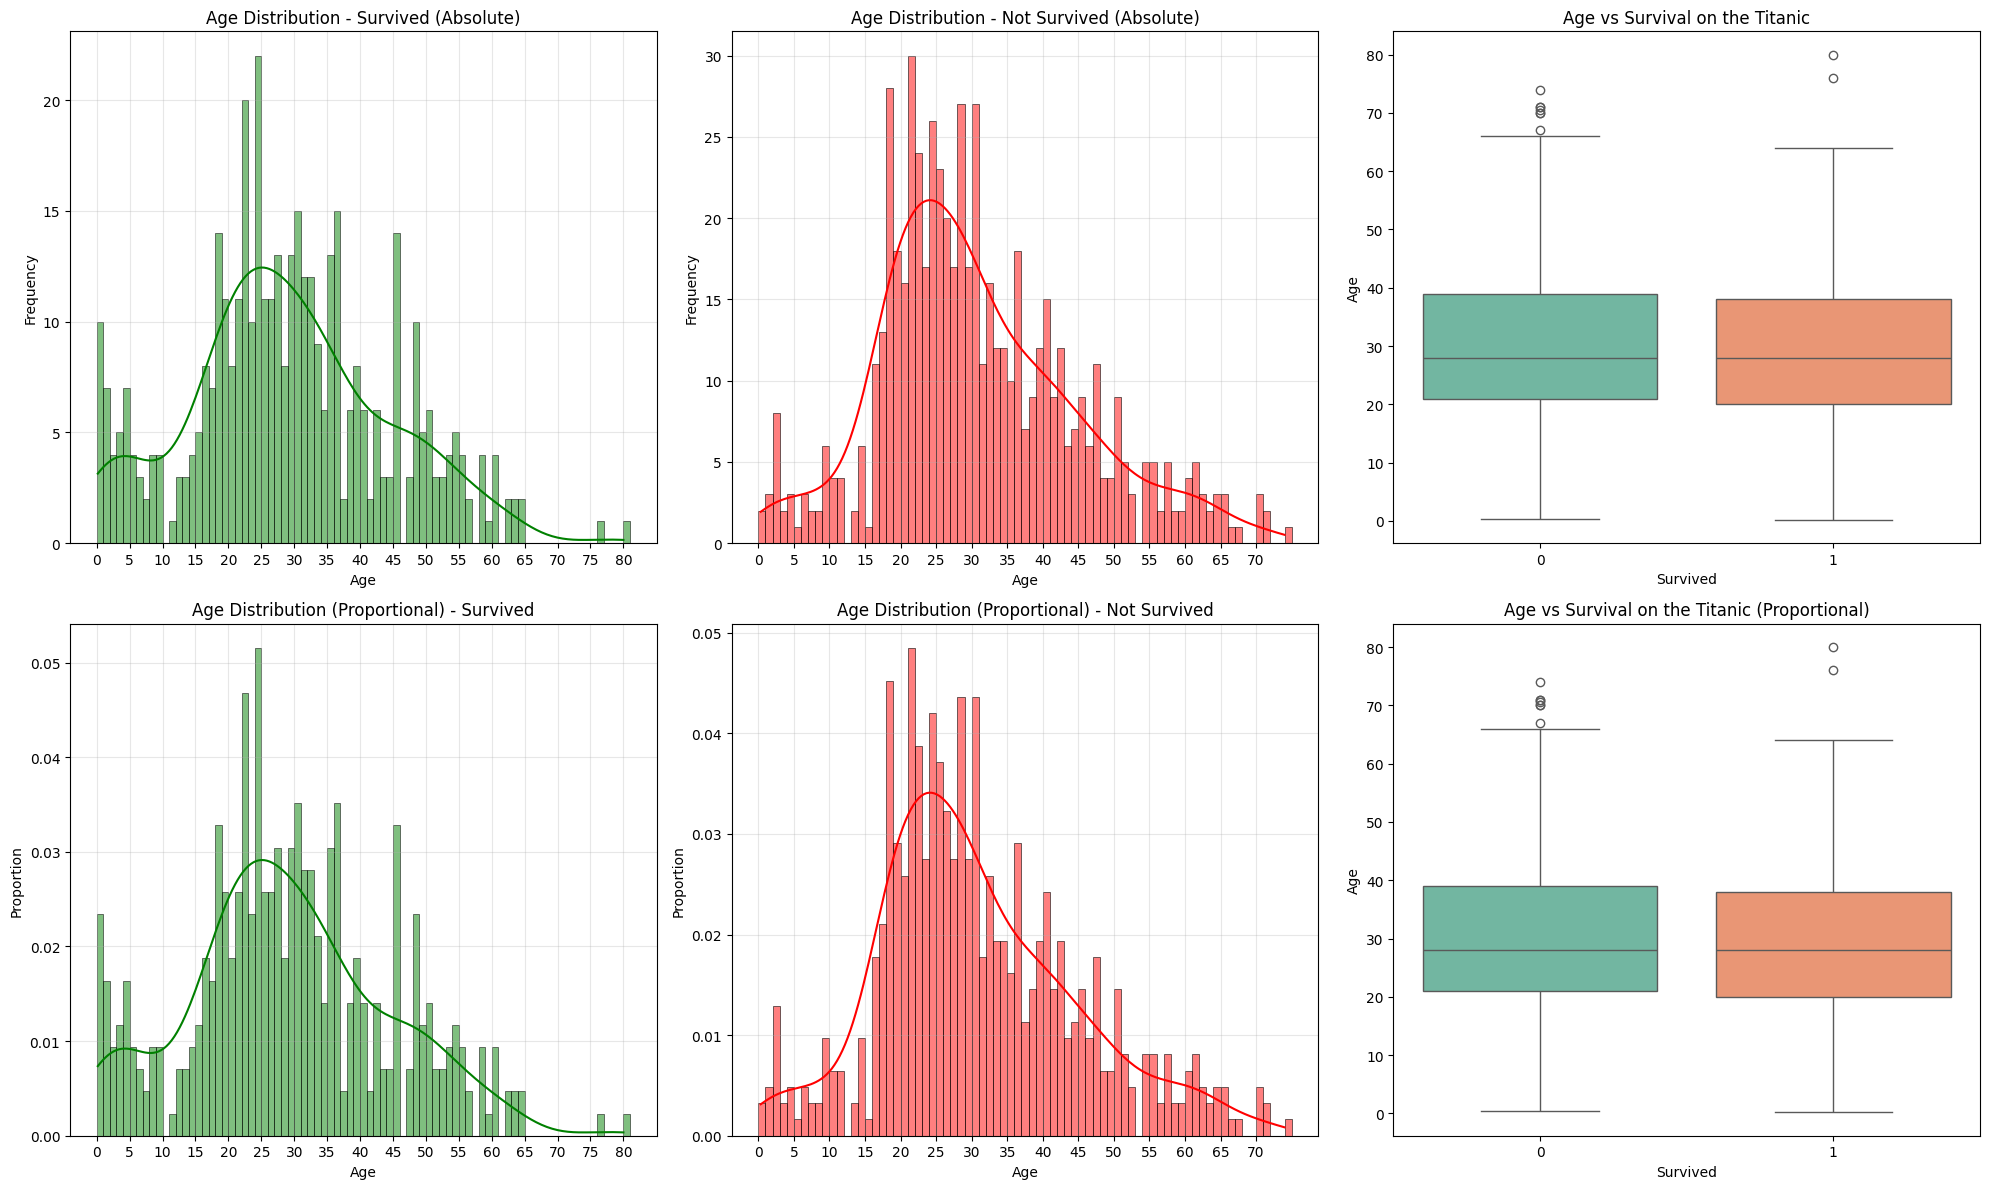

In [596]:
plt.figure(figsize=(20, 12))

#1st plot: Age Distribution (Frequency) - Survived
plt.subplot(2, 3, 1)
bins_survived = np.arange(0, survived['age'].max() + 2)
sns.histplot(data=survived, x='age', bins=bins_survived, 
             kde=True, color='green',
             binrange=(0, survived['age'].max() + 1))
plt.title('Age Distribution - Survived (Absolute)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

#2nd plot: Age Distribution (Frequency) - Not Survived
plt.subplot(2, 3, 2)
bins_not_survived = np.arange(0, not_survived['age'].max() + 2)
sns.histplot(data=not_survived, x='age', bins=bins_not_survived, 
             kde=True, color='red',
             binrange=(0, not_survived['age'].max() + 1))
plt.title('Age Distribution - Not Survived (Absolute)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, not_survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

#3rd plot: Boxplot - Age vs Survived
plt.subplot(2, 3, 3)
sns.boxplot(x='survived', y='age', data=df, palette="Set2")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age vs Survival on the Titanic")

#4th plot: Age Distribution (Proportional) - Survived
plt.subplot(2, 3, 4)
sns.histplot(data=survived, x='age', bins=bins_survived, 
             stat='probability', kde=True, color='green',
             binrange=(0, survived['age'].max() + 1))
plt.title('Age Distribution (Proportional) - Survived')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(np.arange(0, survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

#5th plot: Age Distribution (Proportional) - Not Survived
plt.subplot(2, 3, 5)
sns.histplot(data=not_survived, x='age', bins=bins_not_survived, 
             stat='probability', kde=True, color='red',
             binrange=(0, not_survived['age'].max() + 1))
plt.title('Age Distribution (Proportional) - Not Survived')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(np.arange(0, not_survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

#6th plot: Boxplot - Age vs Survived (Proportional)
plt.subplot(2, 3, 6)
sns.boxplot(x='survived', y='age', data=df, palette="Set2")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age vs Survival on the Titanic (Proportional)")

plt.tight_layout()
plt.show()


Based on this, we observe a notable difference in the survival rates of individuals, with infants between 0 and 10 years old having a higher chance of survival. On the other hand, older individuals, starting from 65 years and above, had a lower chance of survival. However, since the majority of the population falls between the ages of 15 and 40, this does not significantly impact the boxplots, and the mean age remains fairly stable between the survived and not survived groups. It might be interesting to remove the age variable and instead create a new categorical variable with the following age groups: below 15 years, between 15 and 50 years, and above 50 years

### Fare

Fare represents the amount of money payed by a passenger individually

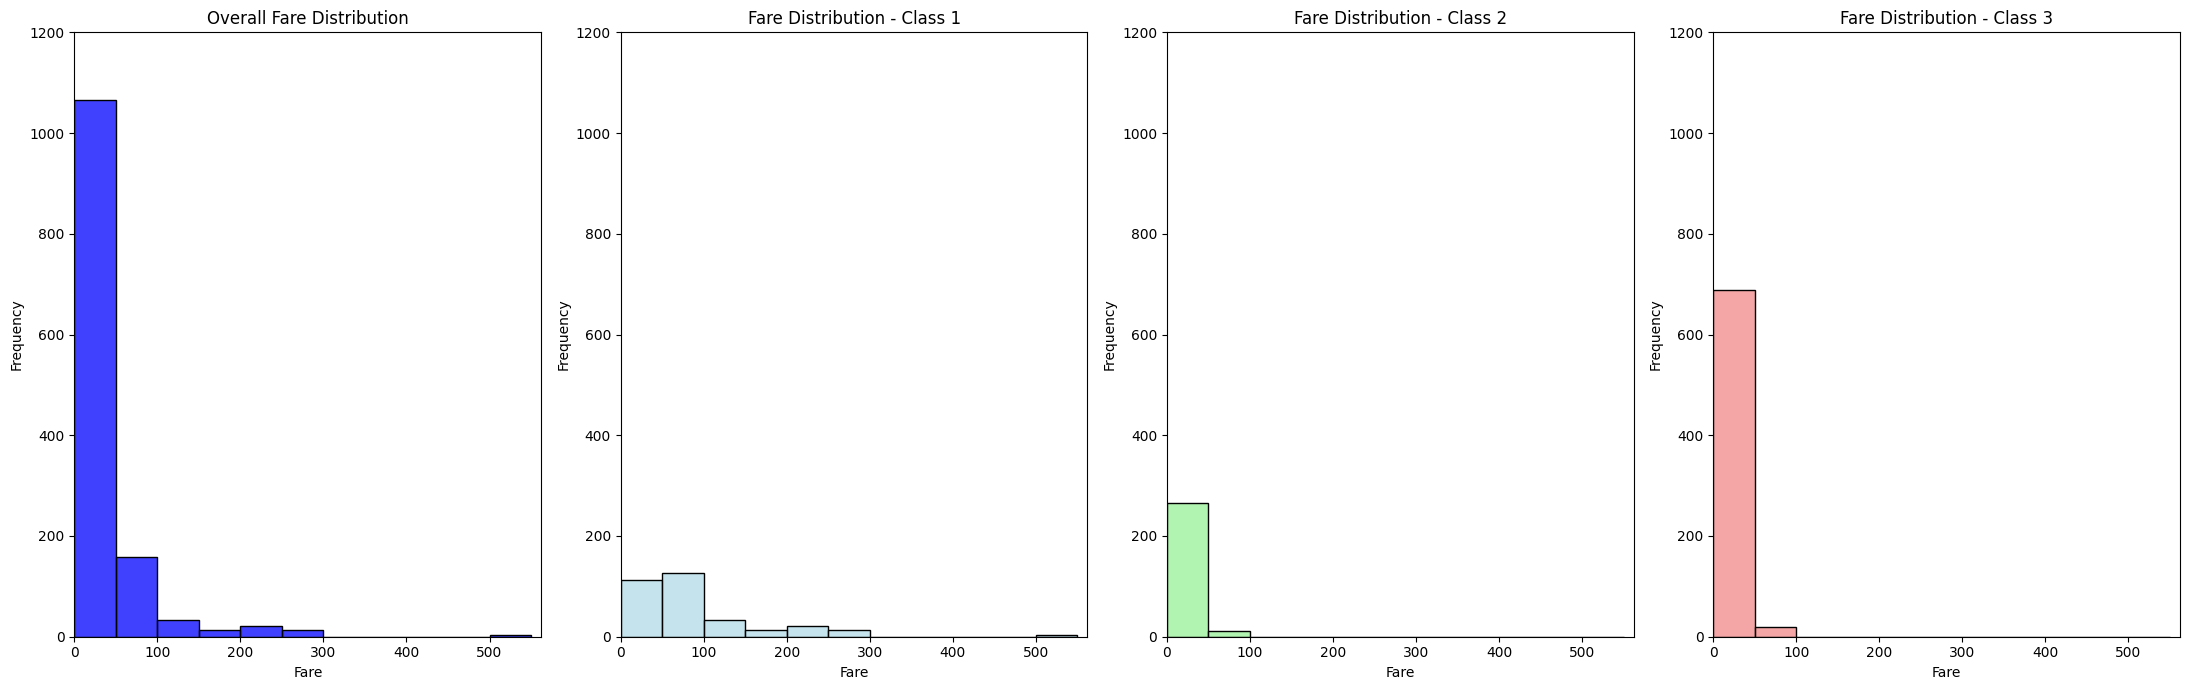

In [597]:
fig, axes = plt.subplots(1, 4, figsize=(22, 7))

bin_edges = range(0, int(df['fare'].max()) + 50, 50)

sns.histplot(df['fare'], color='blue', ax=axes[0], bins=bin_edges)
axes[0].set_title('Overall Fare Distribution')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Plot fare distribution for Class 1 (Second plot)
sns.histplot(df[df['pclass'] == 1]['fare'], color='lightblue', ax=axes[1], bins=bin_edges, alpha=0.7)
axes[1].set_title('Fare Distribution - Class 1')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

# Plot fare distribution for Class 2 (Third plot)
sns.histplot(df[df['pclass'] == 2]['fare'], color='lightgreen', ax=axes[2], bins=bin_edges, alpha=0.7)
axes[2].set_title('Fare Distribution - Class 2')
axes[2].set_xlabel('Fare')
axes[2].set_ylabel('Frequency')

# Plot fare distribution for Class 3 (Fourth plot)
sns.histplot(df[df['pclass'] == 3]['fare'], color='lightcoral', ax=axes[3], bins=bin_edges, alpha=0.7)
axes[3].set_title('Fare Distribution - Class 3')
axes[3].set_xlabel('Fare')
axes[3].set_ylabel('Frequency')

# Apply the same x and y limits to all plots for consistency
max_fare = df['fare'].max()
axes[0].set_xlim(0, max_fare + 50)
axes[1].set_xlim(0, max_fare + 50)
axes[2].set_xlim(0, max_fare + 50)
axes[3].set_xlim(0, max_fare + 50)
axes[0].set_ylim(0, 1200)
axes[1].set_ylim(0, 1200)
axes[2].set_ylim(0, 1200)
axes[3].set_ylim(0, 1200)

plt.tight_layout()
plt.show()


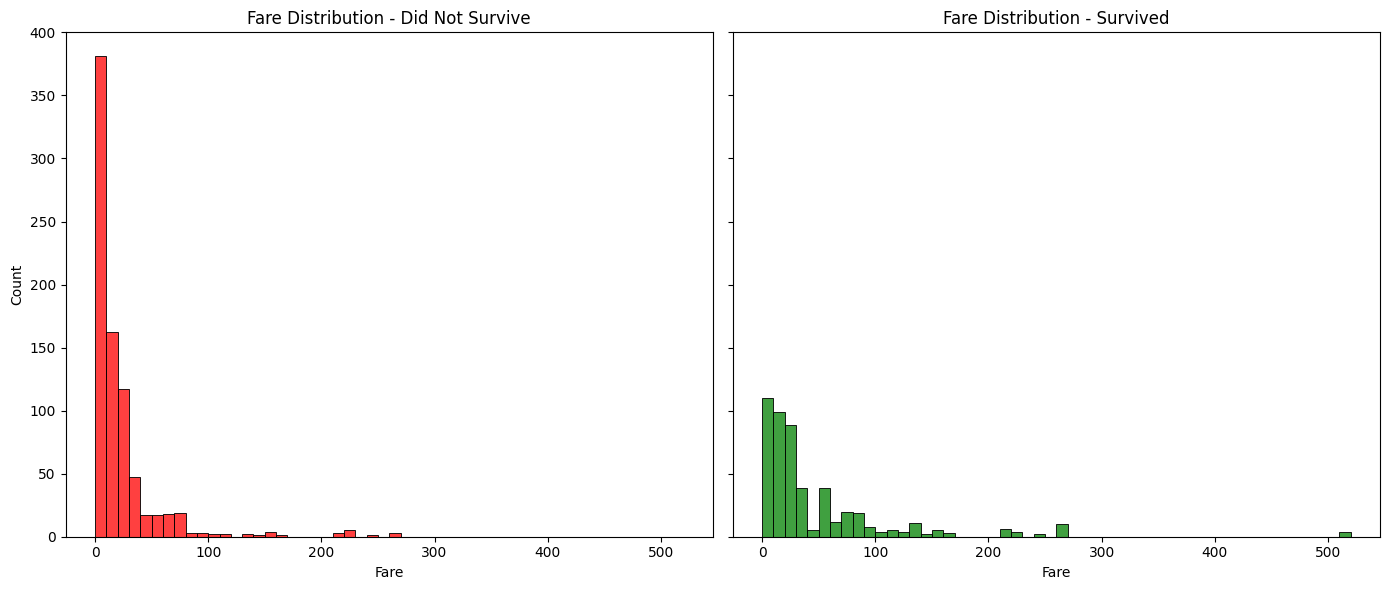

In [598]:
bin_width = 10  
max_fare = df['fare'].max()
bins = np.arange(0, max_fare + bin_width, bin_width)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True, sharex=True)

sns.histplot(df[df['survived'] == 0]['fare'], 
             bins=bins, color='red', ax=axes[0])
axes[0].set_title('Fare Distribution - Did Not Survive')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

sns.histplot(df[df['survived'] == 1]['fare'], 
             bins=bins, color='green', ax=axes[1])
axes[1].set_title('Fare Distribution - Survived')
axes[1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

In [599]:
max_fare = df['fare'].max()
person_max_fare = df[df['fare'] == max_fare]
print("Person who paid the highest fare:")
print(person_max_fare)


Person who paid the highest fare:
     pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183 

### Body

This variable will be removed later due to data leakage. Moving forward, we will focus exclusively on the individuals who did not survive. However, before continuing, let’s explore a few small insights.

In [600]:
print("All non-NaN values in the 'body' column:")
print(np.sort(df['body'].dropna().values))

total_values = df['body'].count()
total_entries = len(df['body'])

print(f"Total known values in 'body': {total_values}")
print(f"Total entries in 'body' (including NaN): {total_entries}")


All non-NaN values in the 'body' column:
[  1.   4.   7.   9.  14.  15.  16.  17.  18.  19.  22.  32.  35.  37.
  38.  43.  45.  46.  47.  50.  51.  52.  53.  58.  61.  62.  67.  68.
  69.  70.  72.  75.  79.  80.  81.  89.  96.  97.  98. 101. 103. 108.
 109. 110. 119. 120. 121. 122. 124. 126. 130. 131. 133. 135. 142. 143.
 147. 148. 149. 153. 155. 156. 165. 166. 169. 171. 172. 173. 174. 175.
 176. 181. 187. 188. 189. 190. 196. 197. 201. 206. 207. 208. 209. 230.
 232. 234. 236. 245. 249. 255. 256. 258. 259. 260. 261. 263. 269. 271.
 275. 283. 284. 285. 286. 287. 292. 293. 294. 295. 297. 298. 299. 304.
 305. 306. 307. 309. 312. 314. 322. 327. 328.]
Total known values in 'body': 121
Total entries in 'body' (including NaN): 1309


C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\2929310194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_counts.index, y=body_percentage.values, palette='pastel')


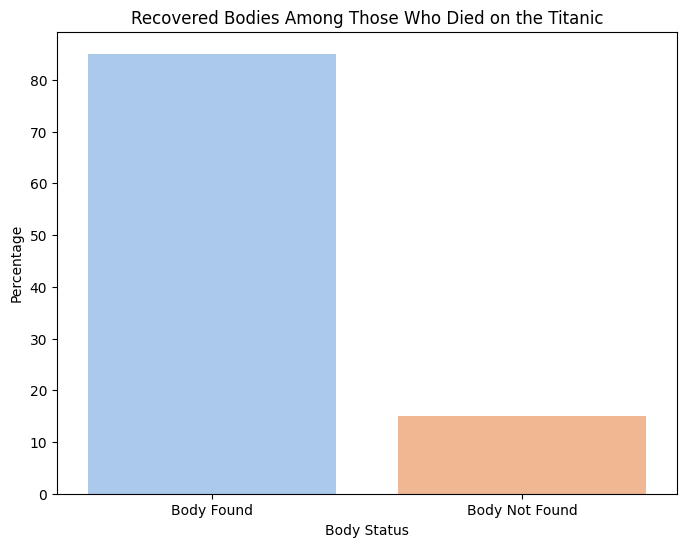

In [601]:
died = df[df['survived'] == 0]

body_counts = died['body'].notna().value_counts()
body_counts.index = ['Body Found', 'Body Not Found']

body_percentage = (body_counts / body_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=body_counts.index, y=body_percentage.values, palette='pastel')
plt.title('Recovered Bodies Among Those Who Died on the Titanic')
plt.ylabel('Percentage')
plt.xlabel('Body Status')
plt.show()


## Categorical Variables

- **Pclass**
- **Embarked**
- **Boat**
- **Sex**
- **Survived**

### Sex

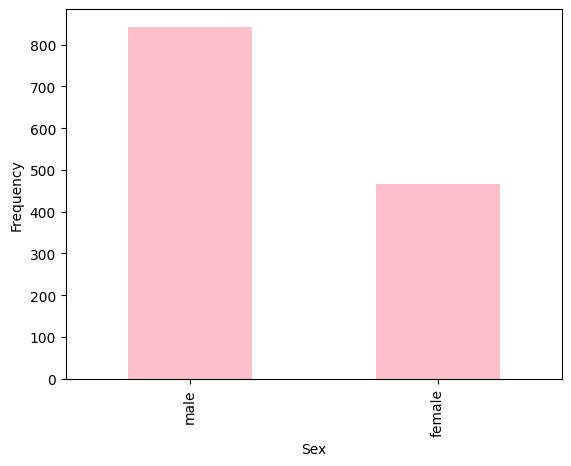

In [602]:
df['sex'].value_counts().plot(kind='bar', edgecolor = 'none', color = 'pink')
plt.title('')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

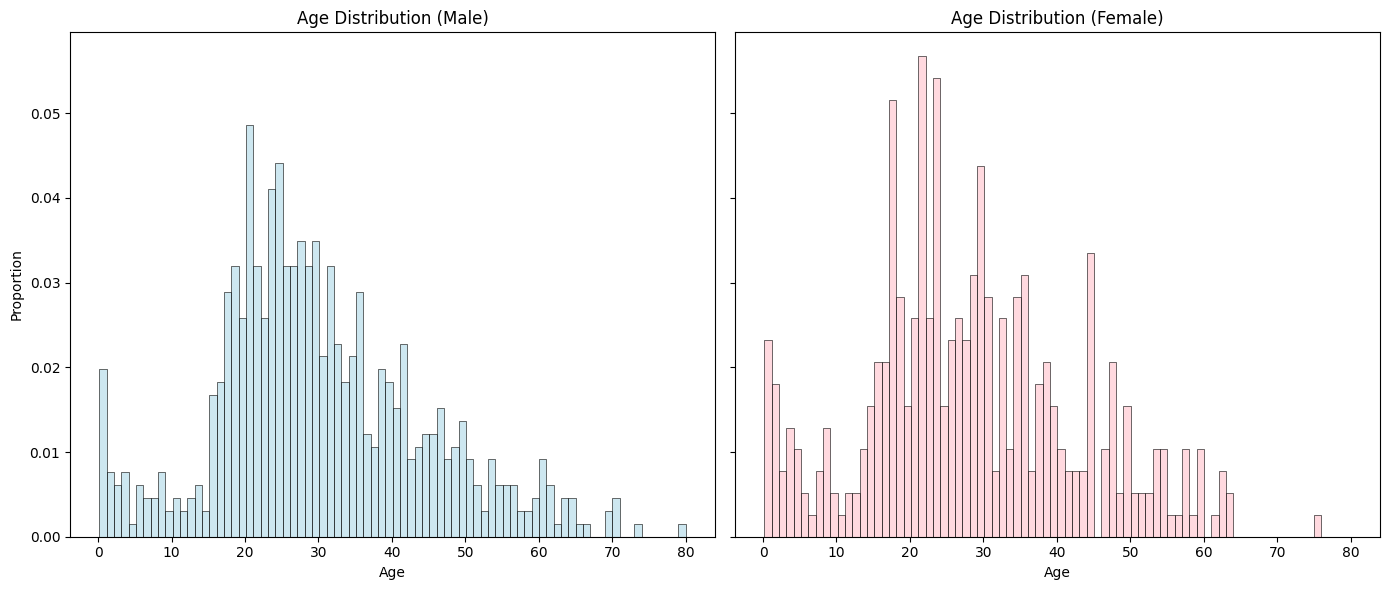

In [603]:
bins = np.linspace(df['age'].min(), df['age'].max(), 81)  
male_ages = df[df['sex'] == 'male']['age'].dropna()
female_ages = df[df['sex'] == 'female']['age'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(male_ages, bins=bins, color='lightblue', alpha=0.6, stat='probability', ax=axes[0])
axes[0].set_title('Age Distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Proportion')

sns.histplot(female_ages, bins=bins, color='pink', alpha=0.6, stat='probability', ax=axes[1])
axes[1].set_title('Age Distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

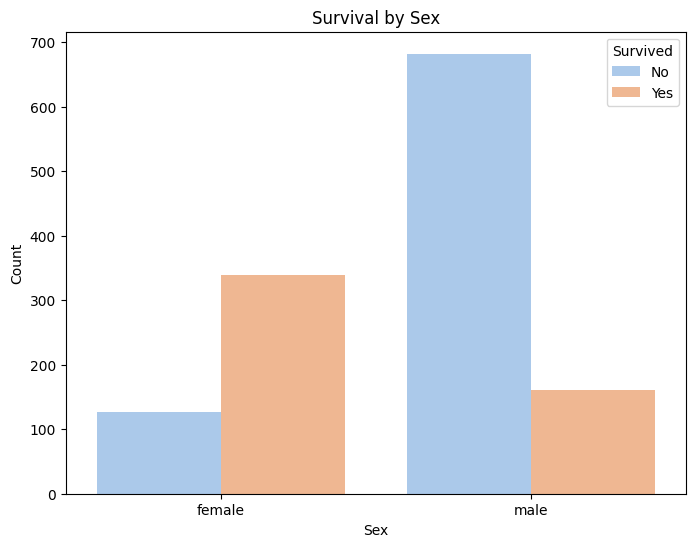

In [604]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='survived', palette='pastel')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

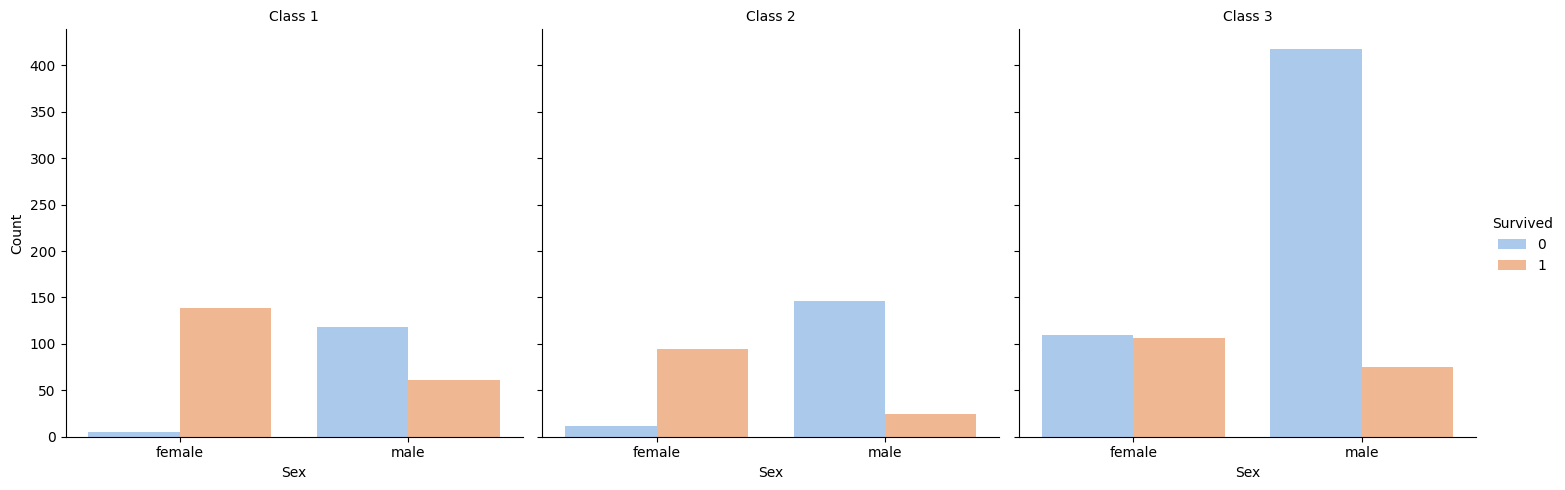

In [605]:
g = sns.catplot(data=df, x='sex', hue='survived', col='pclass', kind='count', palette='pastel', dodge=True)
g.set_titles('Class {col_name}')
g.set_axis_labels('Sex', 'Count')
g.legend.set_title('Survived')
plt.show()

### Embarked

C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\1060798563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=df, palette='tab20c')


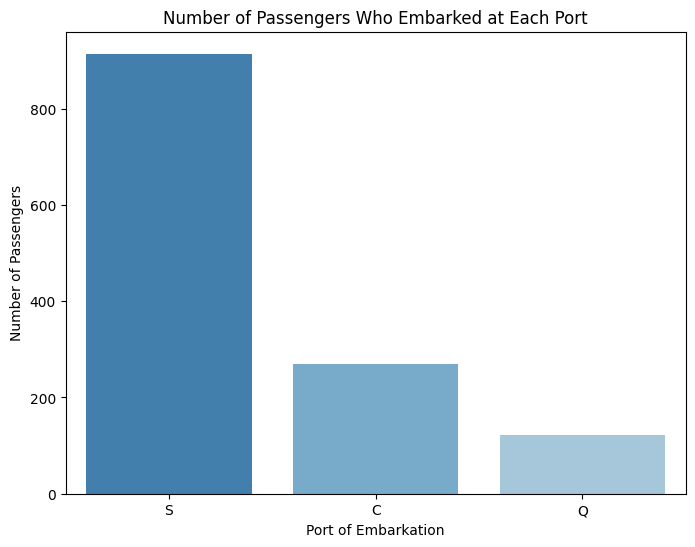

In [606]:
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df, palette='tab20c')

plt.title('Number of Passengers Who Embarked at Each Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.show()

### Pclass

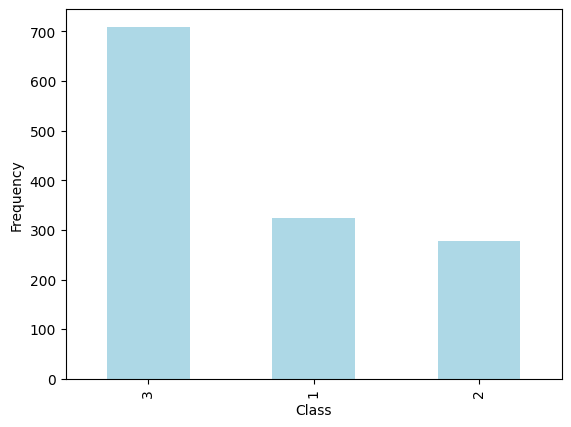

In [607]:
df['pclass'].value_counts().plot(kind='bar', edgecolor = 'none', color='lightblue')
plt.title('')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

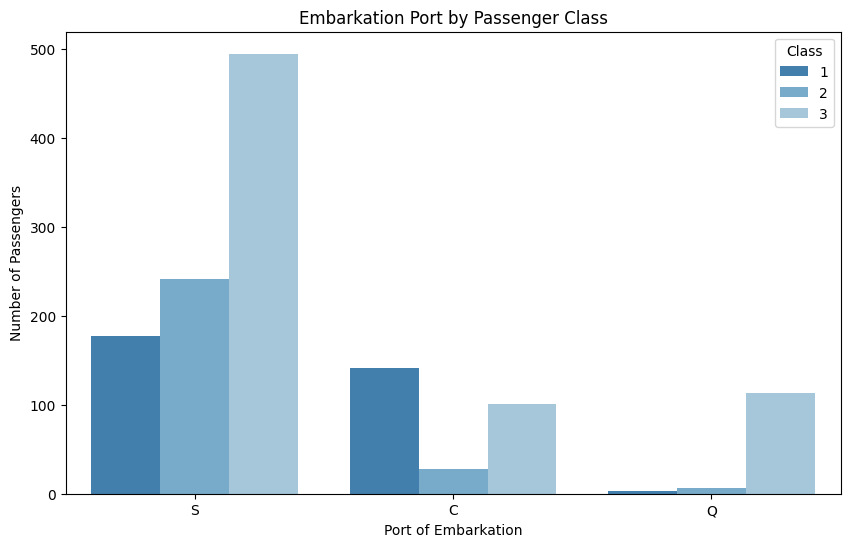

In [608]:
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', hue='pclass', data=df, palette='tab20c')

plt.title('Embarkation Port by Passenger Class')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.legend(title='Class')
plt.show()

In [609]:
embarked_class_counts = df.groupby('embarked')['pclass'].value_counts(normalize=True).unstack() * 100
embarked_class_counts.columns = ['Class 1 (%)', 'Class 2 (%)', 'Class 3 (%)']
print(embarked_class_counts.round(2))

          Class 1 (%)  Class 2 (%)  Class 3 (%)
embarked                                       
C               52.22        10.37        37.41
Q                2.44         5.69        91.87
S               19.37        26.48        54.16


C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\1757916685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=df, palette='tab20c')


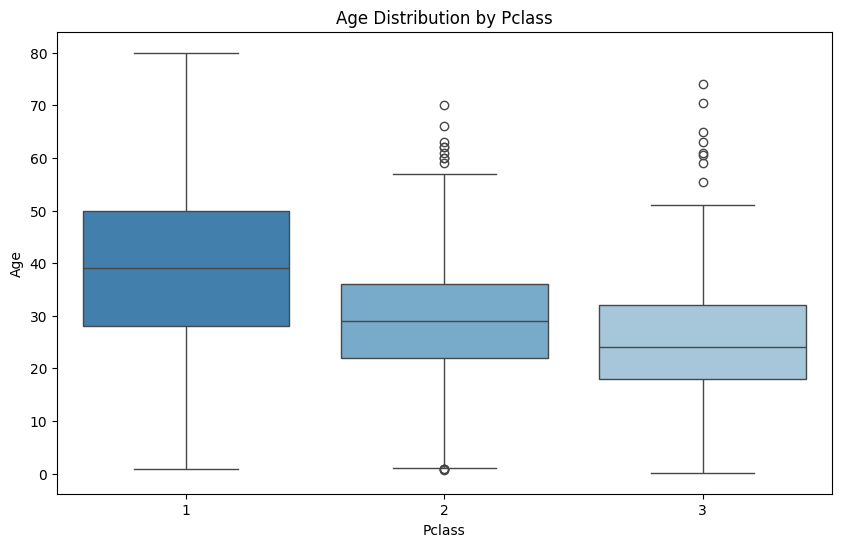

In [610]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='pclass', y='age', data=df, palette='tab20c')

plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

## Survival (Target Variable)

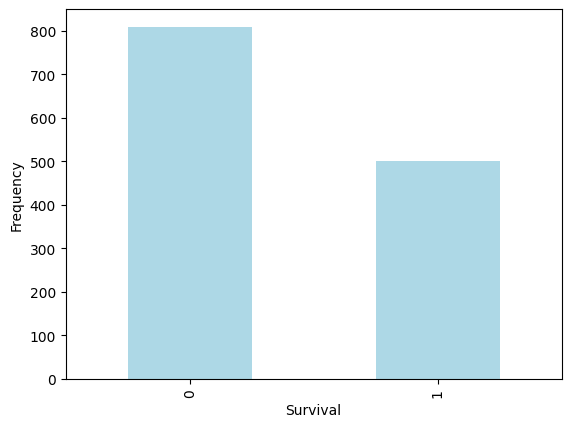

In [611]:
df['survived'].value_counts().plot(kind='bar', edgecolor = 'none', color= 'lightblue')
plt.title('')
plt.xlabel('Survival')
plt.ylabel('Frequency')
plt.show()


AÑadir correlation matrix

### Is Data Accessible?  
- Is the data enough?  
- Is the data usable?  
- Are the data tidy? (Lecture 1, Slide 14)  
  - If not, we need feature engineering to tidy it up.  
  - Are data tidy but incomplete? If yes, we need data imputation methods.  
  - Are data tidy but with duplicates?  
  - Are data tidy but expired or significantly out of date?  
  - Are data tidy but incomplete or unrepresentative of the phenomenon?  

### Do We Know the Source of Our Data?  
- Were gender data manually inputted, or were they the result of a low-quality classifier?  

### Is There Data Leakage?  
- Is the prediction target (implicitly) contained in the training dataset?  
  - Example: Given a spreadsheet with several columns containing information about real estates, we want to train a model that predicts the selling price of each estate. We remove the column about the selling price but keep the one about the commission of the estate agent. The model learns the correlation between the agent’s commission and the final price, skewing our evaluation. In deployment, that information is not available, and the model fails most of the time.  

### Are the Data Reliable? Can We Trust the Labels?  
- We can perform (manual, automated) validation of quality on a subset of the data.  
- Are labels delayed? We observe labels now but use them to predict far future events.  
- Are labels indirect? Indicating a weak correlation with the prediction target (e.g., page interest).  
- Do we have feedback loops?  
  - We train the model on the results of that model’s predictions (e.g., a recommendation system promotes its own prediction to the users that click on it, indirectly reinforcing that very same prediction in the model).  

---

### Common Data Issues  
- **Cost, Noise, Bias, Low Predictive Power, Outdated Examples, Outliers, Leakage**  
- **High Cost of (Labeled) Data:**  
  - Utilize well-designed labeling tools for humans to streamline the labeling process: crowdsourcing and gamification of the task (e.g., reCAPTCHA, leaderboard, score), reduce decision-making to yes/no questions, noisy pre-labeling.  


# EXTRA

The boat and Body Variables are data leakage, so we are dropping them

In [612]:
df = df.drop(columns=['boat', 'body'])
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')


# Task 2: Managing Missing Values
Lecture Material: Lecture 3, slides 22–24.
- Identify the columns containing missing values.
- Develop a strategy to address them.

In [613]:
missing_values = df.isnull().sum()
print(missing_values)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
home.dest     564
dtype: int64


## Dealing with age missing values

Most interesting way group by class and sex, survived and find mean. Buscar un plot de boxplots. REVISAR ESTO -> Demasiada Variance en age!!

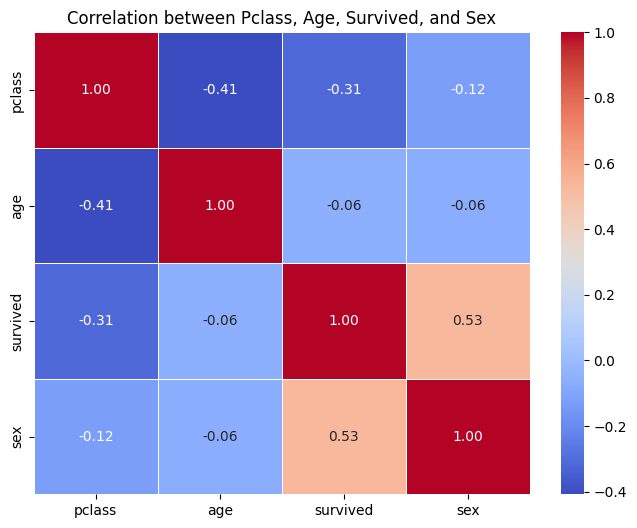

In [614]:
# Convertir en variable numerica
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

columns_of_interest = ['pclass', 'age', 'survived', 'sex']
corr_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Pclass, Age, Survived, and Sex")
plt.show()


In [615]:
# Check how many NaN values are in 'age'
print(f"Missing values in 'age': {df['age'].isnull().sum()}")

# Calculate the mean age grouped by 'pclass', 'sex', and 'survived'
age_grouped = df.groupby(['pclass', 'sex', 'survived'])['age'].mean().reset_index()
print("Mean ages by group:")
print(age_grouped)

# Function to replace NaN with the corresponding group mean or 'Unknown' if no mean is found
def fill_age(row):
    if pd.isna(row['age']):
        # Find the mean for the matching group
        mean_age = age_grouped[
            (age_grouped['pclass'] == row['pclass']) &
            (age_grouped['sex'] == row['sex']) &
            (age_grouped['survived'] == row['survived'])
        ]['age']
        
        # If a mean is found, return it, otherwise return 'Unknown'
        if not mean_age.empty:
            return mean_age.values[0]
        else:
            return "Unknown"
    else:
        return row['age']

# Apply the function to the DataFrame
df['age'] = df.apply(fill_age, axis=1)

# Check if NaN values were replaced
print("\nAfter filling missing ages:")
print(df['age'].isnull().sum())
print(df[['age', 'pclass', 'sex', 'survived']].head())


Missing values in 'age': 263
Mean ages by group:
    pclass  sex  survived        age
0        1    0         0  43.658163
1        1    0         1  36.168240
2        1    1         0  35.200000
3        1    1         1  37.109375
4        2    0         0  33.092593
5        2    0         1  17.449274
6        2    1         0  34.090909
7        2    1         1  26.711051
8        3    0         0  26.679598
9        3    0         1  22.436441
10       3    1         0  23.418750
11       3    1         1  20.814815

After filling missing ages:
0
       age  pclass  sex  survived
0  29.0000       1    1         1
1   0.9167       1    0         1
2   2.0000       1    1         0
3  30.0000       1    0         0
4  25.0000       1    1         0


## Dealing with fare missing values

1 missing value

find someone who was in the same class, embarked on the same port, on the same cabin. ALso check if he had parents/children who were there and check if they all payed the same and if went through the same class and characteristics. 

DO the mean?
Delete entry?

Similar fares [7.55, 7.65, 7.65, 7.925, 7.25, 8.05, 7.8875, 7.925, 7.05, 7.05, 8.05, 8.3, 22.525, 7.7958, 7.775, 7.8542, 7.8958, 7.775, 7.05, 7.7958, 7.05, 7.8542, 8.05, 7.8958, 8.05, 8.05, 7.775, 9.35, 56.4958, 7.775, 7.75, 7.8958, 16.1, 7.8542, 7.7958, 8.05, 8.6625, 8.6625, 8.6625, 8.6625, 8.6625, 8.6625, 8.05, 7.7958, 7.8542, 7.25, 8.05, 56.4958, 8.05, 7.05, 8.05, 7.4958, 7.4958, 8.05, 7.8958, 7.8958, 7.8958, 8.05, 7.25, 8.1583, 8.6625, 8.05, 10.5167, 10.1708, 7.8958, 7.8958, 8.05, 9.5, 9.5, 7.8958, 7.8958, 7.8958, 7.25, 7.25, 7.8958, 8.6625, 7.8958, 8.05, 12.475, 8.05, 7.55, 7.775, 7.775, 6.975, 7.25, 12.475, 15.1, 7.05, 7.7958, 56.4958, 8.05, 7.25, 14.5, 8.05, 7.85, 7.05, 8.05, 8.3625, 8.05, 9.8458, 7.775, 8.85, 9.5, 7.8542, 7.55, 7.25, 6.975, 56.4958, 7.925, 7.925, 8.9625, 7.8958, 7.775, 6.45, 22.525, 7.925, 8.05, 7.65, 7.8875, 7.8958, 7.8958, 7.7958, 7.05, 7.8542, 7.8542, 8.1125, 6.4958, 7.775, 7.7958, 8.6542, 7.775, 7.8542, 0.0, 7.775, 0.0, 7.8958, 7.8542, 7.8542, 7.925, 7.125,

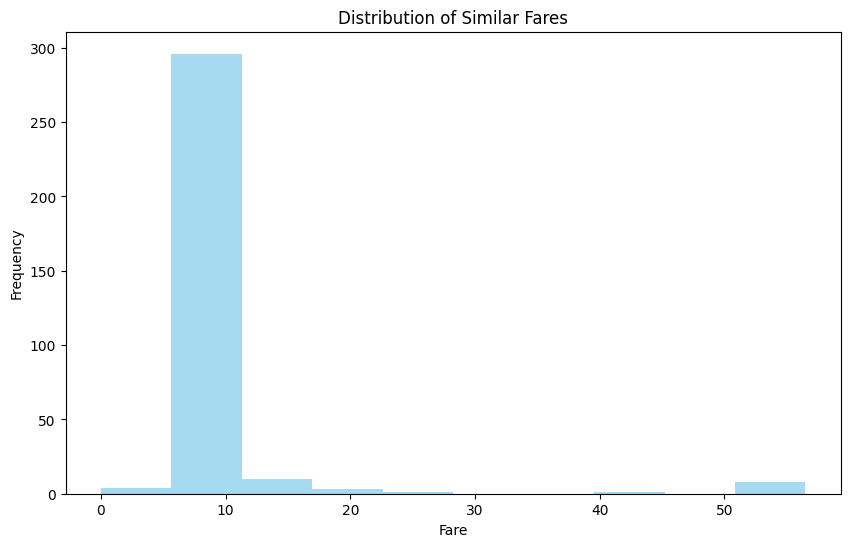

In [616]:


def get_similar_fares(df, passenger_index):
    passenger = df.loc[passenger_index]
    
    similar_passengers = df[
        (df['pclass'] == passenger['pclass']) & 
        (df['embarked'] == passenger['embarked']) & 
        (df['sibsp'] == passenger['sibsp']) &  
        (df['parch'] == passenger['parch'])  
    ]
    
    similar_passengers = similar_passengers[similar_passengers['fare'].notnull()]
    
    return similar_passengers['fare'].tolist()

missing_fare_index = df[df['fare'].isnull()].index[0] 
similar_fares = get_similar_fares(df, missing_fare_index)

print(f"Similar fares {similar_fares}")

plt.figure(figsize=(10, 6))
sns.histplot(similar_fares, bins=10, color='skyblue', edgecolor = 'none')
plt.title('Distribution of Similar Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [617]:
#missing fare passenger info
passenger_info = df.loc[missing_fare_index]
print("Información del pasajero con 'Fare' faltante:")
print(passenger_info)


Información del pasajero con 'Fare' faltante:
pclass                        3
survived                      0
name         Storey, Mr. Thomas
sex                           0
age                        60.5
sibsp                         0
parch                         0
ticket                     3701
fare                        NaN
cabin                       NaN
embarked                      S
home.dest                   NaN
Name: 1225, dtype: object


No family aboard, no cabin...

## Dealing with cabin missing values

So many missing values, drop column o ar unknown , at the momeent unknown, later discussed if its really miningful to have this variable

In [618]:
df['Cabin'].fillna('Unknown', inplace=True)

KeyError: 'Cabin'

## Dealing with embarked missing values

Delete or put the most repated

In [ ]:
missing_embarked = df[df['embarked'].isnull()]
print(missing_embarked)

     pclass  survived                                       name  sex   age  \
168       1         1                        Icard, Miss. Amelie    1  38.0   
284       1         1  Stone, Mrs. George Nelson (Martha Evelyn)    1  62.0   

     sibsp  parch  ticket  fare cabin embarked boat  body       home.dest  
168      0      0  113572  80.0   B28      NaN    6   NaN             NaN  
284      0      0  113572  80.0   B28      NaN    6   NaN  Cincinatti, OH  


Same ticket number, but not family. 

        fare  pclass embarked
6    77.9583       1        S
12   69.3000       1        C
13   78.8500       1        S
18   76.2917       1        C
19   75.2417       1        C
..       ...     ...      ...
304  75.2500       1        C
306  77.2875       1        S
307  77.2875       1        S
316  61.3792       1        C
317  61.3792       1        C

[77 rows x 3 columns]


C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\214942395.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=filtered_passengers, palette='tab20c', ax=axes[0])
C:\Users\Cate\AppData\Local\Temp\ipykernel_14372\214942395.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=df, palette='tab20c', ax=axes[1])


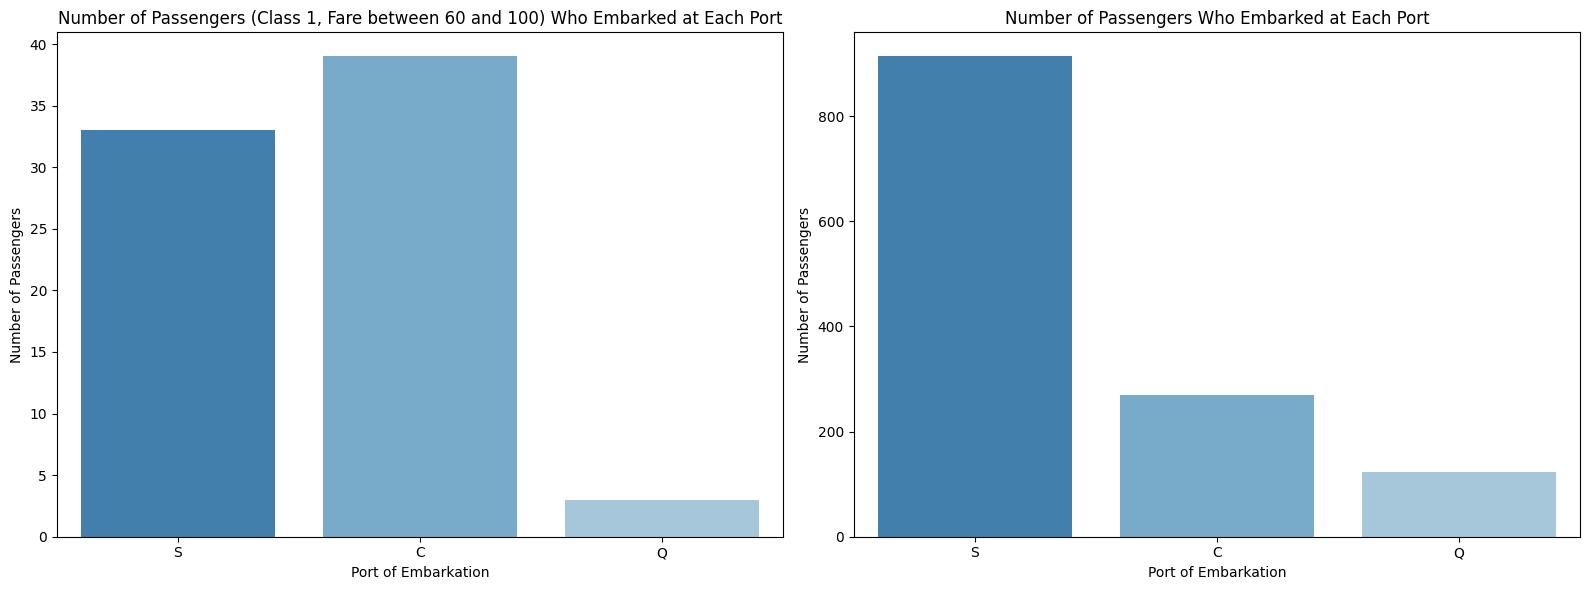

In [ ]:
# Pclass that with fare between 60 and 100
filtered_passengers = df[(df['pclass'] == 1) & (df['fare'] > 60.0) & (df['fare'] < 100.0)]
print(filtered_passengers[['fare', 'pclass', 'embarked']])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='embarked', data=filtered_passengers, palette='tab20c', ax=axes[0])
axes[0].set_title('Number of Passengers (Class 1, Fare between 60 and 100) Who Embarked at Each Port')
axes[0].set_xlabel('Port of Embarkation')
axes[0].set_ylabel('Number of Passengers')

sns.countplot(x='embarked', data=df, palette='tab20c', ax=axes[1])
axes[1].set_title('Number of Passengers Who Embarked at Each Port')
axes[1].set_xlabel('Port of Embarkation')
axes[1].set_ylabel('Number of Passengers')

plt.tight_layout()
plt.show()


## Other Missing values

boat, body, home dest (si hay familiar llendo al mismo sitio ponerle la misma destination)

# Task 3: Encoding Categorical Variables
Lecture material: Lecture 4, slides 10–15, 21.
- Identify the categorical variables in the dataset.
- Utilize OneHotEncoder to encode them.
- Observe the transformation and discuss its impact on machine learning models

Categorical: male/female, class (done), embarked, survived (done)     boat?   cabin? ticket? home? dest?

In [619]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

print(df.head())
#sex_1 is female

   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch  ticket      fare    cabin                        home.dest  \
0      0      0   24160  211.3375       B5                     St Louis, MO   
1      1      2  113781  151.5500  C22 C26  Montreal, PQ / Chesterville, ON   
2      1      2  113781  151.5500  C22 C26  Montreal, PQ / Chesterville, ON   
3      1      2  113781  151.5500  C22 C26  Montreal, PQ / Chesterville, ON   
4      1      2  113781  151.5500  C22 C26  Montreal, PQ / Chesterville, ON   

   sex_1  embarked_Q  embarked_S  
0  

# Task 4: Feature Scaling
Lecture material: Lecture 5, slides 14–20.
- Standardize the numerical variables using StandardScaler.
- Normalize the numerical variables using MinMaxScaler.
- Discuss the differences between standardization and normalization, along with their importance

In [623]:
print(df.dtypes)
numerical_columns = ['age', 'sibsp', 'parch', 'fare']

pclass          int64
survived        int64
name           object
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
home.dest      object
sex_1            bool
embarked_Q       bool
embarked_S       bool
dtype: object


In [624]:
scaler = sklearn.preprocessing.StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())

        age     sibsp     parch      fare
0 -0.031015 -0.479087 -0.445000  3.441165
1 -2.157978  0.481288  1.866526  2.285603
2 -2.075931  0.481288  1.866526  2.285603
3  0.044722  0.481288  1.866526  2.285603
4 -0.333966  0.481288  1.866526  2.285603


In [625]:
scaler_minmax = sklearn.preprocessing.MinMaxScaler()
df[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())

        age  sibsp     parch      fare
0  0.361169  0.000  0.000000  0.412503
1  0.009395  0.125  0.222222  0.295806
2  0.022964  0.125  0.222222  0.295806
3  0.373695  0.125  0.222222  0.295806
4  0.311064  0.125  0.222222  0.295806


# Task 5: Data Splitting
Lecture material: Lecture 2, slides 4–7.
- Split the dataset into training, validation, and test sets.
- Ensure that the split reflects the original distribution of the target variable using stratification.
Note: a good strategy is to first split the dataset into ‘training’ and ‘others’, and then split ‘others’ into equally
sized ‘validation’ and ‘test’ sets. When splitting sets, consider the argument stratify of the train test split
method.

solo la proportionde sutrvived tiene que ser igual? tb hay que añadir 

In [626]:
train_df, others_df = sklearn.model_selection.train_test_split(df, test_size=0.2, stratify=df['survived'], random_state=42)
valid_df, test_df = sklearn.model_selection.train_test_split(others_df, test_size=0.5, stratify=others_df['survived'], random_state=42)


In [627]:
print("Train set distribution:")
print(train_df['survived'].value_counts(normalize=True))

print("\nValidation set distribution:")
print(valid_df['survived'].value_counts(normalize=True))

print("\nTest set distribution:")
print(test_df['survived'].value_counts(normalize=True))

Train set distribution:
survived
0    0.617956
1    0.382044
Name: proportion, dtype: float64

Validation set distribution:
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64

Test set distribution:
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


# Task 6: Addressing Class Imbalance
Lecture material: Lecture 3, slides 25–27; Lecture 4, slides 4–5.
- Apply a method to address class imbalance (e.g., Oversampling Technique (SMOTE), Adaptive Synthetic
Sampling Method (ADASYN)).
Note: You can load a SMOTE and/or ADASYN implementation from the Python module imblearn.



# Task 7: Feature Selection
Lecture material: Lecture 5, slides 10–14, 19.
- Eliminate low variance and highly correlated features.
- Why do we carry out tasks 6 and 7 after splitting the dataset into training, validation, and test sets? Could
we have conducted them on the entire dataset instead? Please elaborate on your answer.

In [628]:
def drop_unwanted_columns(df):
    columns_to_drop = ['name', 'home.dest', 'cabin', 'ticket']
    df_dropped = df.drop(columns=columns_to_drop)
    print(f"Columns dropped: {columns_to_drop}")
    return df_dropped

# Low variance features
def remove_low_variance_features(df, threshold=0.01):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f"Low variance features removed: {low_variance_features}")
    return df_cleaned

# Highly correlated features
def remove_highly_correlated_features(df, correlation_threshold=0.7):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f"Highly correlated features removed: {to_drop}")
    return df_cleaned

train_df = drop_unwanted_columns(train_df)
train_df = remove_low_variance_features(train_df) 
train_df = remove_highly_correlated_features(train_df)  



print(train_df.head())


Columns dropped: ['name', 'home.dest', 'cabin', 'ticket']
Low variance features removed: ['parch', 'fare']
Highly correlated features removed: []
      pclass  survived       age  sibsp  sex_1  embarked_Q  embarked_S
999        3         1  0.258640  0.000   True        True       False
392        2         1  0.298538  0.125   True       False       False
628        3         0  0.135699  0.500   True       False        True
1165       3         0  0.311064  0.000  False       False       False
604        3         1  0.198330  0.000   True       False        True


# Task 8: Training a Logistic Regression Model
Lecture material: Lecture 6, slides 5–9.
- Train a Logistic Regression Model to predict whether a passenger survives.
Note: Use the method predict from the class LogisticRegression with the validation set. Have fun finding
a visually appealing way to display the results of the predictions on the validation set. An analysis of model
performance is not required and will not affect your final grade for the assignment. However, I won’t stop you from
including it. 8-)

Predictions on the validation set: [0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1]
Accuracy on the validation set: 0.8092


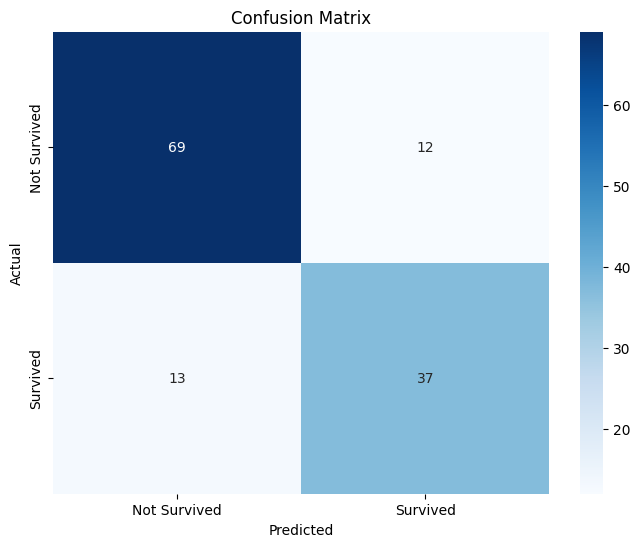

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        81
           1       0.76      0.74      0.75        50

    accuracy                           0.81       131
   macro avg       0.80      0.80      0.80       131
weighted avg       0.81      0.81      0.81       131



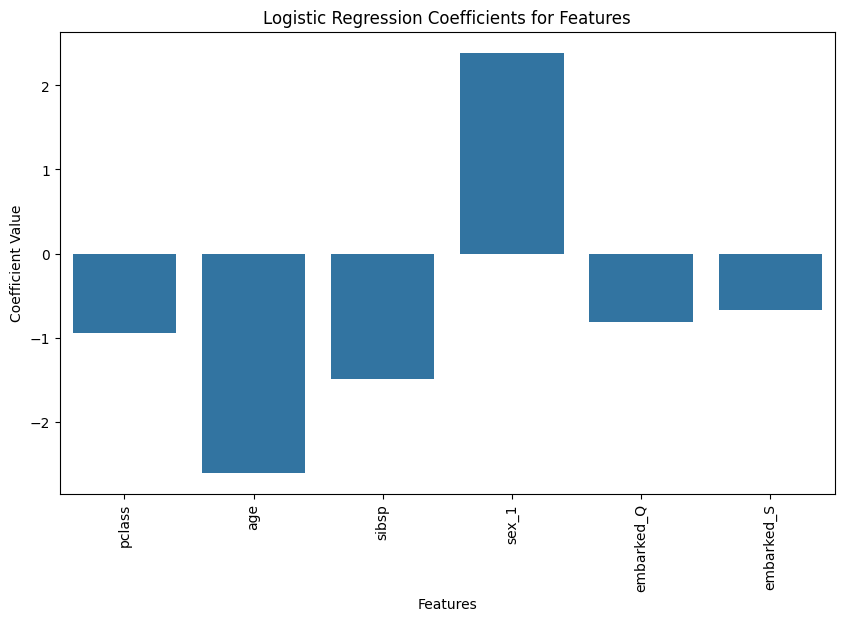

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = train_df.drop(columns=['survived'])  
y_train = train_df['survived']  


logreg_model = LogisticRegression(max_iter=1000, random_state=42)

logreg_model.fit(X_train, y_train)


X_valid = valid_df.drop(columns=['survived', 'name', 'home.dest', 'cabin', 'ticket', 'parch', 'fare'])
y_valid = valid_df['survived']

y_pred = logreg_model.predict(X_valid)


print(f"Predictions on the validation set: {y_pred}")

accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on the validation set: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_valid, y_pred)
print(f"Classification Report:\n{class_report}")
coefficients = logreg_model.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients)
plt.title('Logistic Regression Coefficients for Features')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()
